<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


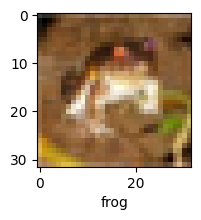

In [10]:
plot_sample(X_train, y_train, 0)


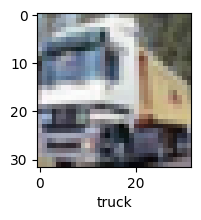

In [11]:
plot_sample(X_train, y_train, 1)


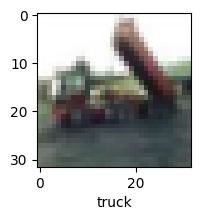

In [12]:
plot_sample(X_train, y_train, 2)


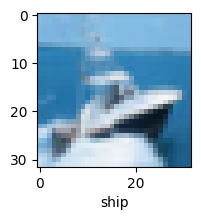

In [13]:
plot_sample(X_train, y_train, 8)


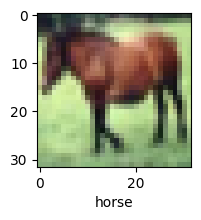

In [14]:
plot_sample(X_train, y_train, 7)


In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.3042 - loss: 1.9311
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.4235 - loss: 1.6373
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.4523 - loss: 1.5511
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.4754 - loss: 1.4941
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.4931 - loss: 1.4415


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.71      0.53      1000
           1       0.71      0.42      0.53      1000
           2       0.42      0.29      0.34      1000
           3       0.34      0.37      0.35      1000
           4       0.57      0.23      0.33      1000
           5       0.48      0.23      0.31      1000
           6       0.46      0.65      0.54      1000
           7       0.50      0.58      0.54      1000
           8       0.66      0.55      0.60      1000
           9       0.44      0.73      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3724 - loss: 1.7134
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.5852 - loss: 1.1832
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.6411 - loss: 1.0245
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.6707 - loss: 0.9408
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.7044 - loss: 0.8567
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.7206 - loss: 0.8014
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.7413 - loss: 0.7472
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7588 - loss: 0.6976
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7718 - loss: 0.6604
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7836 - loss: 0.6156


In [22]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7022 - loss: 0.9115


[0.9222130179405212, 0.6980999708175659]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.4565171e-03, 5.2470359e-04, 3.9835223e-03, 9.0294975e-01,
        1.3309792e-03, 3.1183658e-02, 4.4569150e-02, 3.1277683e-05,
        1.3076435e-02, 8.9386053e-04],
       [1.5434693e-03, 1.0500327e-02, 7.4278487e-06, 5.0186436e-08,
        1.6379463e-08, 3.1234151e-10, 8.5277577e-08, 7.8877733e-08,
        9.8258376e-01, 5.3646429e-03],
       [1.7413082e-02, 3.6576203e-01, 2.6539392e-03, 5.7157194e-03,
        1.4553452e-04, 1.1889713e-03, 2.8045678e-03, 4.9619027e-04,
        5.9510851e-01, 8.7114349e-03],
       [9.0996367e-01, 1.6145188e-02, 4.4634160e-02, 1.4029075e-03,
        1.1138108e-02, 9.4868856e-06, 1.5173395e-03, 4.8952131e-04,
        9.9062305e-03, 4.7934656e-03],
       [2.9014868e-06, 3.7027668e-05, 2.2428667e-03, 2.0504253e-02,
        8.0979753e-01, 8.3918852e-04, 1.6655502e-01, 5.2402233e-06,
        1.5343598e-05, 7.1637891e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [25]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

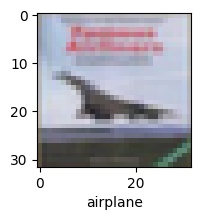

In [26]:
plot_sample(X_test, y_test,3)


In [27]:
classes[y_classes[3]]


'airplane'

In [28]:
classes[y_classes[3]]


'airplane'